<a href="https://colab.research.google.com/github/hazamp01/Machine_Learning/blob/main/CNN_on_MNST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Load mnsit dataset 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image=x_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

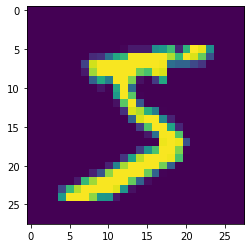

In [9]:
plt.imshow(single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape
# this 6000 is the  y_train shape

(60000,)

In [13]:
# Converts class vector integers to binay class matrix
y_example=to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]
# this belongs to class number 5 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# convert to categorical labels
y_cat_test=to_categorical(y_test,num_classes=10)

In [17]:
y_cat_train=to_categorical(y_train,10)

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
# In future i assume all my images for input to my model will be in the range of 0-255
x_train=x_train/255

In [22]:
x_test=x_test/255

In [24]:
scaled_image=x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
scaled_image.max()

1.0

In [26]:
scaled_image.min()

0.0

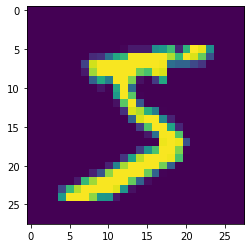

In [48]:
plt.imshow(scaled_image)

In [49]:
# reshape the data
x_train.shape

(60000, 28, 28, 1)

In [50]:
# Add one more dimension that we're dealing with single RGB channel from 0-1 before normalization
x_train=x_train.reshape(60000,28,28,1)
# (batch size ,width,height,colorchannels)

In [51]:
x_test=x_test.reshape(10000,28,28,1)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [53]:
# lets begin build the model by adding layers
model=Sequential()

In [54]:
# first layer is a convolutiuon layer 
# filter,kernel,strides,padding are the main attributes what values we choose baseed on the input size
# if youre dealing with large images you should use filters like more than 32
# strides are 
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#output layer
# I should have one neuron per class
# softmax is beacuse of its multi class 
model.add(Dense(10,activation='softmax'))
# keras.io/metrics --->will show you how to build metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])





In [55]:
# input shape determine by your input data
# flatter the data
# Set the dense layers =number of neurons to your class 
# for binay classification with activation of sigmoid
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_Stop=EarlyStopping(monitor='val_loss',patience=1)

In [57]:
model.fit(x_train,y_cat_train,
          validation_data=(x_test,y_cat_test),callbacks=[early_Stop])

1875/1875 [==============================] - 35s 18ms/step - loss: 0.3021 - accuracy: 0.9073 - val_loss: 0.0604 - val_accuracy: 0.9799


In [58]:
# model evaluation
metrics=pd.DataFrame(model.history.history)

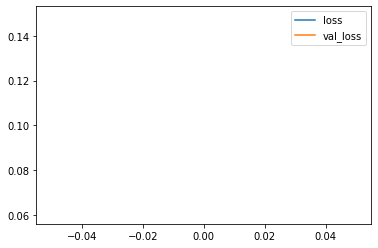

In [63]:
metrics[['loss','val_loss']].plot()

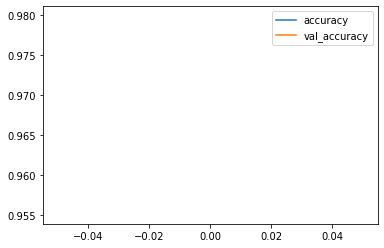

In [64]:
metrics[['accuracy','val_accuracy']].plot()

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.06036680191755295, 0.9799000024795532]

In [67]:
# classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
predictions=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [69]:
y_cat_test.shape

(10000, 10)

In [70]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [76]:
# Get classification report
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      1.00      0.97      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [72]:
# Get confusion matrix
confusion_matrix(y_test,predictions)

array([[ 967,    0,    5,    2,    0,    0,    3,    1,    1,    1],
       [   0, 1127,    2,    2,    0,    0,    2,    0,    2,    0],
       [   1,    5, 1005,   14,    1,    0,    0,    5,    1,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    1,    1,    0],
       [   1,    0,    4,    0,  969,    0,    3,    0,    1,    4],
       [   2,    0,    0,   10,    0,  876,    2,    0,    0,    2],
       [   6,    2,    0,    1,    2,    3,  944,    0,    0,    0],
       [   0,    3,   14,    2,    0,    0,    0, 1004,    2,    3],
       [   1,    0,    8,   14,    5,    2,    4,    4,  924,   12],
       [   0,    4,    0,    7,    9,    4,    0,    7,    1,  977]])

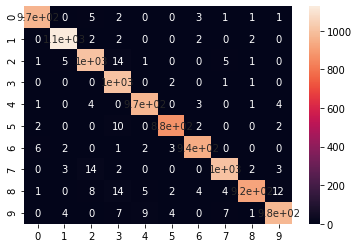

In [77]:
import seaborn as sns
# Annotation will give actual numbers
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

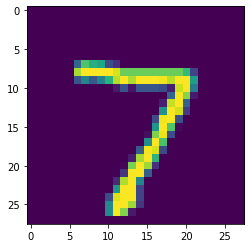

In [85]:
my_number=x_test[0]
plt.imshow(my_number.reshape(28,28))

In [82]:
#num_images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])